# AI-based Surveying the Impact of Environmental, Climatic, Economic and Demographic Conditions on the Epidemic Outbreak Rate of COVID-19

$Mehryar{\,}Majd$, $Ramin{\,}Mousa$ \& $Arsalan{\,}Mousazadeh$

__Abstract:__ This study aims to have an analytical and predictive approach to the growth rate and spread of the first wave of COVID-19 infection and mainly focuses on its dependency on other global factors in affected countries via Artificial Intelligence-based processing of fatality data/statistics. Fatality, infected, and recovered cases in the form of the time-series data was acquired through the World Health Organization (WHO) & the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Recorded health data subsequently was analyzed by several Deep Neural Network (DNN) models to create a better intuition of epidemic outbreak rate of COVID-19. Monitoring spreading trend changes becomes more feasible via continuous observation of statistical pattern and integrating the other datasets with more global features count as factors influencing the local conditions on historical data conveys pivotal information concerning learning the pattern of epidemic progression. In this study, attention-based Sequence-to-Sequence (Seq2Seq) models empowered by Long-Short Term Memory (LSTM) and Gated Recurrent Unit (GRU) units, were deployed to predict mortality rate. Ultimately these analyses are utilized to monitor infection behaviour on time-series data and were subsequently assessed for their performance to predict the behaviour of the first wave of COVID-19 outbreak rate intensely. Demographic & environmental conditions have likely been influenced significantly to shape the reliable predictive learning algorithms for long-duration risk of COVID-19 pandemic.

### Data Analysis of COVID-19 for __China__ 	![](http://flagpedia.net/data/flags/small/cn.png)
__Attention-based Sequence-to-Sequence (Seq2Seq) model__

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from matplotlib import pyplot as plt
import os
for dirname, _, filenames in os.walk('novel-corona-virus/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


novel-corona-virus/time_series_covid_19_confirmed.csv
novel-corona-virus/COVID19_open_line_list.csv
novel-corona-virus/countries of the world.csv
novel-corona-virus/time_series_covid_19_recovered.csv
novel-corona-virus/covid_19_data.csv
novel-corona-virus/COVID19_line_list_data.csv
novel-corona-virus/time_series_covid_19_deaths.csv
novel-corona-virus/sars_2003_complete_dataset_clean.csv


In [18]:
#df_covid_19 = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv')
df_covid_19 = pd.read_csv("novel-corona-virus/covid_19_data.csv")
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_covid_19.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Date', 'Outbreak'],
      dtype='object')

In [19]:
df_covid_19 = df_covid_19[df_covid_19["Country/Region"]=="Mainland China"]

# Only Coid dataset

In [20]:
df_sars_03 = pd.read_csv("novel-corona-virus/sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
print(df_sars_03.columns)
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed', 'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},axis=1,inplace=True)

Index(['Date', 'Country', 'Cumulative number of case(s)', 'Number of deaths',
       'Number recovered', 'Province/State', 'Outbreak'],
      dtype='object')


In [21]:
df_sars_03 = df_sars_03[df_sars_03["Country/Region"]=="China"]
df_sars_03.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Province/State,Outbreak
9,2003-03-18,China,0,0,0,None,SARS_2003
18,2003-03-19,China,0,0,0,None,SARS_2003
30,2003-03-20,China,0,0,0,None,SARS_2003
43,2003-03-21,China,0,0,0,None,SARS_2003
58,2003-03-22,China,0,0,0,None,SARS_2003


In [22]:
templ_cols = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = pd.concat([df_covid_19[templ_cols], df_sars_03[templ_cols]])
df = df.reset_index(drop=True)


In [23]:
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])
df.head()

,Outbreak,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
1703,SARS_2003,Others,China,2003-03-18,0.0,0.0,0.0
1704,SARS_2003,Others,China,2003-03-19,0.0,0.0,0.0
1705,SARS_2003,Others,China,2003-03-20,0.0,0.0,0.0
1706,SARS_2003,Others,China,2003-03-21,0.0,0.0,0.0
1707,SARS_2003,Others,China,2003-03-22,0.0,0.0,0.0


In [24]:
t = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] >=0]
df = pd.merge(df,t[[]],left_on=['Outbreak','Country/Region','Province/State'], right_index=True)


In [25]:
df['Province/State'] = df['Province/State'].astype('category')
df['Country/Region'] = df['Country/Region'].astype('category')
df['Outbreak'] = df['Outbreak'].astype('category')
df['Province/State'] = df['Province/State'].cat.codes
df['Country/Region'] = df['Country/Region'].cat.codes
df['Outbreak'] = df['Outbreak'].cat.codes
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df.head(2)

,Outbreak,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Month,Week
1703,1,20,0,2003-03-18,0.0,0.0,0.0,3,12
1704,1,20,0,2003-03-19,0.0,0.0,0.0,3,12


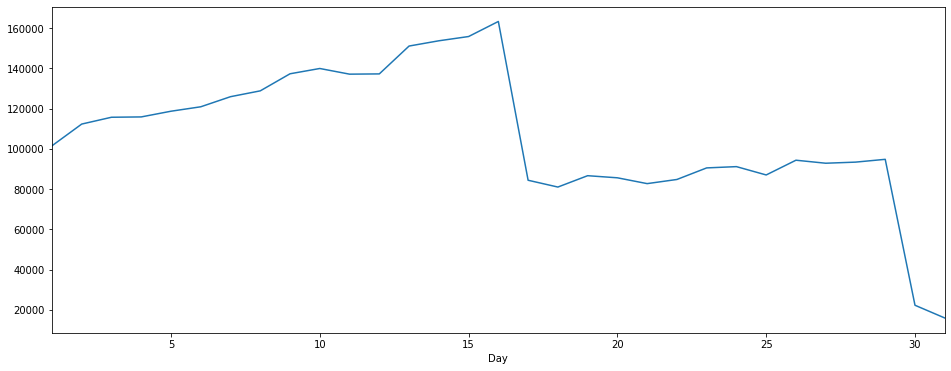

In [27]:
df['Day'] = df['Date'].apply(lambda x:x.day)
df['Hour'] = df['Date'].apply(lambda x:x.hour)
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,6))
df.groupby('Day').sum()['Confirmed'].plot()

In [28]:
df=df[[ 'Province/State', 'Country/Region', 'Day','Confirmed','Deaths','Recovered']]

In [29]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM,GRU
from keras.layers import Dense
def load_data(data, time_step=2, after_day=1, validate_percent=0.67):
    seq_length = time_step + after_day
    result = []
    for index in range(len(data) - seq_length + 1):
        result.append(data[index: index + seq_length])
    result = np.array(result)
    print('total data: ', result.shape)

    train_size = int(len(result) * validate_percent)
    train = result[:train_size, :]
    validate = result[train_size:, :]

    x_train = train[:, :time_step]
    y_train = train[:, time_step:]
    x_validate = validate[:, :time_step]
    y_validate = validate[:, time_step:]
    
     

    return [x_train, y_train, x_validate, y_validate]

Using TensorFlow backend.


In [58]:
def base_model(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.50))
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.50))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.50))
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(Dropout(0.50))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model

def seq2seq(feature_len=1, after_day=1, input_shape=(8, 1)):
    '''
    Encoder:
    X = Input sequence
    C = LSTM(X); The context vector

    Decoder:
    y(t) = LSTM(s(t-1), y(t-1)); where s is the hidden state of the LSTM(h and c)
    y(0) = LSTM(s0, C); C is the context vector from the encoder.
    '''

    # Encoder
    encoder_inputs = Input(shape=input_shape) # (timesteps, feature)
    encoder = LSTM(units=100,dropout=0.5 ,return_state=True,  name='encoder')
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    states = [state_h, state_c]

    # Decoder
    reshapor = Reshape((1, 100), name='reshapor')
    decoder = LSTM(units=100, dropout=0.5 ,return_sequences=True, return_state=True, name='decoder')

    # Densor
    #tdensor = TimeDistributed(Dense(units=200, activation='linear', name='time_densor'))
    densor_output = Dense(units=feature_len, activation='linear', name='output')

    inputs = reshapor(encoder_outputs)
    #inputs = tdensor(inputs)
    all_outputs = []



    for _ in range(after_day):
        outputs, h, c = decoder(inputs, initial_state=states)

        #inputs = tdensor(outputs)
        inputs = outputs
        states = [state_h, state_c]

        outputs = densor_output(outputs)
        all_outputs.append(outputs)

    decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)
    model = Model(inputs=encoder_inputs, outputs=decoder_outputs)

    return model

In [64]:
def normalize_data(data, scaler, feature_len):
    minmaxscaler = scaler.fit(data)
    normalize_data = minmaxscaler.transform(data)
    return normalize_data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=2, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (1794, 6, 6)
train data:  (1435, 2, 6) (1435, 4, 6)
validate data:  (359, 2, 6) (359, 4, 6)


In [46]:
from keras import backend as K
from keras.models import Sequential, load_model, Model
from keras.layers import LSTM, Dense, Activation, TimeDistributed, Dropout, Lambda, RepeatVector, Input, Reshape
from keras.callbacks import ModelCheckpoint

In [47]:
 # model complie
from keras.optimizers import SGD,Adam
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
input_shape = (2, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])

In [48]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 1435 samples, validate on 359 samples
Epoch 1/100
1435/1435 [==============================] - 0s 140us/step - loss: 0.0076 - acc: 0.9810 - rmse: 0.0595 - mse: 0.0076 - r_square: 0.9487 - val_loss: 0.0059 - val_acc: 0.8795 - val_rmse: 0.0530 - val_mse: 0.0059 - val_r_square: 0.9704
Epoch 2/100
1435/1435 [==============================] - 0s 137us/step - loss: 0.0075 - acc: 0.9770 - rmse: 0.0585 - mse: 0.0075 - r_square: 0.9491 - val_loss: 0.0065 - val_acc: 0.8760 - val_rmse: 0.0536 - val_mse: 0.0065 - val_r_square: 0.9669
Epoch 3/100
1435/1435 [==============================] - 0s 141us/step - loss: 0.0073 - acc: 0.9774 - rmse: 0.0585 - mse: 0.0073 - r_square: 0.9503 - val_loss: 0.0058 - val_acc: 0.8712 - val_rmse: 0.0528 - val_mse: 0.0058 - val_r_square: 0.9706
Epoch 4/100
1435/1435 [==============================] - 0s 126us/step - loss: 0.0072 - acc: 0.9761 - rmse: 0.0572 - mse: 0.0072 - r_square: 0.9509 - val_loss: 0.0065 - val_acc: 0.8635 - val_rmse: 0.0532 - val_mse: 0.0

1435/1435 [==============================] - 0s 149us/step - loss: 0.0052 - acc: 0.9824 - rmse: 0.0413 - mse: 0.0052 - r_square: 0.9648 - val_loss: 0.0048 - val_acc: 0.8545 - val_rmse: 0.0383 - val_mse: 0.0048 - val_r_square: 0.9756
Epoch 68/100
1435/1435 [==============================] - 0s 104us/step - loss: 0.0052 - acc: 0.9829 - rmse: 0.0411 - mse: 0.0052 - r_square: 0.9649 - val_loss: 0.0047 - val_acc: 0.8517 - val_rmse: 0.0379 - val_mse: 0.0047 - val_r_square: 0.9759
Epoch 69/100
1435/1435 [==============================] - 0s 106us/step - loss: 0.0051 - acc: 0.9821 - rmse: 0.0411 - mse: 0.0051 - r_square: 0.9650 - val_loss: 0.0048 - val_acc: 0.8531 - val_rmse: 0.0382 - val_mse: 0.0048 - val_r_square: 0.9759
Epoch 70/100
1435/1435 [==============================] - 0s 107us/step - loss: 0.0051 - acc: 0.9821 - rmse: 0.0409 - mse: 0.0051 - r_square: 0.9651 - val_loss: 0.0047 - val_acc: 0.8524 - val_rmse: 0.0379 - val_mse: 0.0047 - val_r_square: 0.9759
Epoch 71/100
1435/1435 [=====

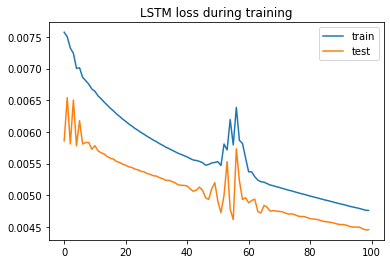

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("LSTM loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.00473670 MSE (0.06882367 RMSE ) , 98.13588854  ACC
Validation Score: 0.00445382 MSE (0.06673694 RMSE ) , 85.51532029  ACC


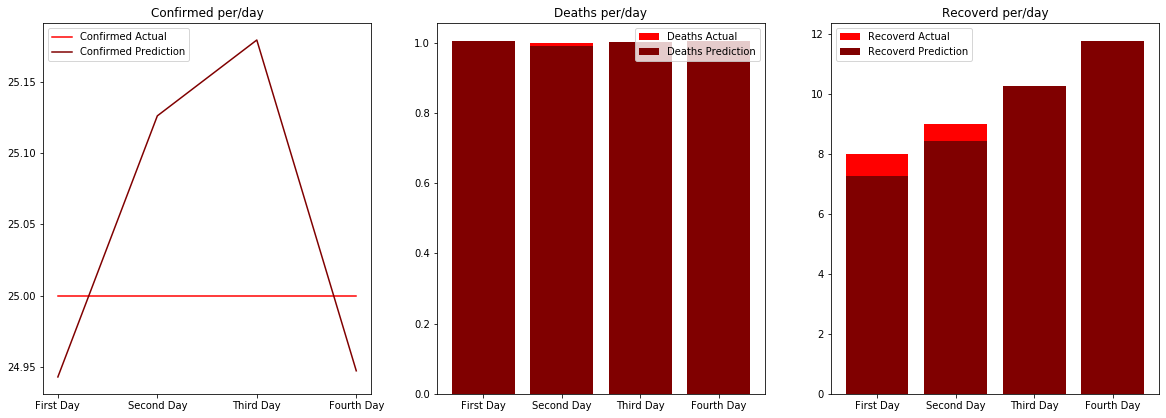

In [50]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Seq2Seq

In [56]:
input_shape = (2, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 1435 samples, validate on 359 samples
Epoch 1/100
1435/1435 [==============================] - 5s 3ms/step - loss: 0.2338 - acc: 0.2848 - rmse: 0.4777 - mse: 0.2338 - r_square: -0.5489 - val_loss: 0.2693 - val_acc: 0.8510 - val_rmse: 0.5177 - val_mse: 0.2693 - val_r_square: -0.3613
Epoch 2/100
1435/1435 [==============================] - 0s 180us/step - loss: 0.1613 - acc: 0.8676 - rmse: 0.3930 - mse: 0.1613 - r_square: -0.0719 - val_loss: 0.1764 - val_acc: 0.8510 - val_rmse: 0.4190 - val_mse: 0.1764 - val_r_square: 0.1090
Epoch 3/100
1435/1435 [==============================] - 0s 178us/step - loss: 0.1106 - acc: 0.9315 - rmse: 0.3126 - mse: 0.1106 - r_square: 0.2615 - val_loss: 0.0931 - val_acc: 0.8510 - val_rmse: 0.3043 - val_mse: 0.0931 - val_r_square: 0.5300
Epoch 4/100
1435/1435 [==============================] - 0s 181us/step - loss: 0.0831 - acc: 0.9354 - rmse: 0.2640 - mse: 0.0831 - r_square: 0.4455 - val_loss: 0.0486 - val_acc: 0.8510 - val_rmse: 0.2168 - val_mse: 0.

1435/1435 [==============================] - 0s 166us/step - loss: 0.0313 - acc: 0.9287 - rmse: 0.1576 - mse: 0.0313 - r_square: 0.7844 - val_loss: 0.0359 - val_acc: 0.8510 - val_rmse: 0.1858 - val_mse: 0.0359 - val_r_square: 0.8190
Epoch 68/100
1435/1435 [==============================] - 0s 167us/step - loss: 0.0316 - acc: 0.9284 - rmse: 0.1575 - mse: 0.0316 - r_square: 0.7820 - val_loss: 0.0360 - val_acc: 0.8510 - val_rmse: 0.1859 - val_mse: 0.0360 - val_r_square: 0.8189
Epoch 69/100
1435/1435 [==============================] - 0s 163us/step - loss: 0.0316 - acc: 0.9256 - rmse: 0.1578 - mse: 0.0316 - r_square: 0.7821 - val_loss: 0.0365 - val_acc: 0.8510 - val_rmse: 0.1874 - val_mse: 0.0365 - val_r_square: 0.8164
Epoch 70/100
1435/1435 [==============================] - 0s 162us/step - loss: 0.0311 - acc: 0.9247 - rmse: 0.1571 - mse: 0.0311 - r_square: 0.7849 - val_loss: 0.0365 - val_acc: 0.8510 - val_rmse: 0.1873 - val_mse: 0.0365 - val_r_square: 0.8164
Epoch 71/100
1435/1435 [=====

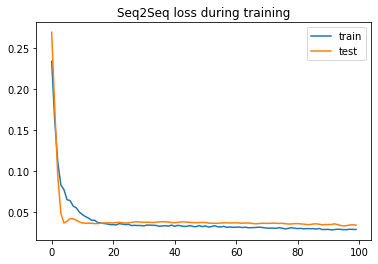

In [57]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Seq2Seq loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.02418824 MSE (0.15552569 RMSE ) , 93.51916376  ACC
Validation Score: 0.03432341 MSE (0.18526578 RMSE ) , 85.09749304  ACC


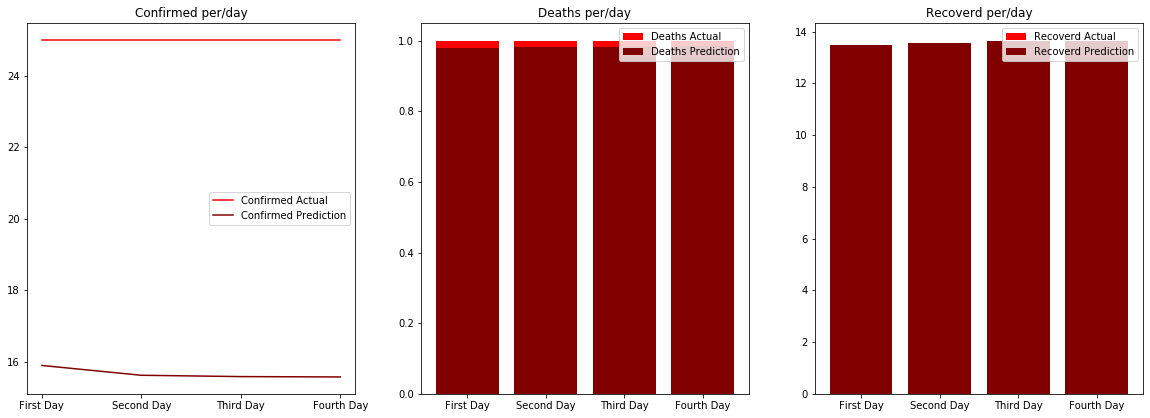

In [60]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# GRU

In [65]:
input_shape = (2, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 1435 samples, validate on 359 samples
Epoch 1/100
1435/1435 [==============================] - 4s 3ms/step - loss: 0.1955 - acc: 0.6796 - rmse: 0.4334 - mse: 0.1955 - r_square: -0.3005 - val_loss: 0.1835 - val_acc: 0.8510 - val_rmse: 0.4245 - val_mse: 0.1835 - val_r_square: 0.0727
Epoch 2/100
1435/1435 [==============================] - 0s 101us/step - loss: 0.1050 - acc: 0.9274 - rmse: 0.3090 - mse: 0.1050 - r_square: 0.3010 - val_loss: 0.0824 - val_acc: 0.8510 - val_rmse: 0.2776 - val_mse: 0.0824 - val_r_square: 0.5842
Epoch 3/100
1435/1435 [==============================] - 0s 108us/step - loss: 0.0797 - acc: 0.9366 - rmse: 0.2647 - mse: 0.0797 - r_square: 0.4706 - val_loss: 0.0519 - val_acc: 0.8510 - val_rmse: 0.2162 - val_mse: 0.0519 - val_r_square: 0.7380
Epoch 4/100
1435/1435 [==============================] - 0s 109us/step - loss: 0.0761 - acc: 0.9139 - rmse: 0.2585 - mse: 0.0761 - r_square: 0.4928 - val_loss: 0.0479 - val_acc: 0.8510 - val_rmse: 0.2029 - val_mse: 0.04

1435/1435 [==============================] - 0s 97us/step - loss: 0.0237 - acc: 0.9653 - rmse: 0.1356 - mse: 0.0237 - r_square: 0.8419 - val_loss: 0.0129 - val_acc: 0.8538 - val_rmse: 0.0971 - val_mse: 0.0129 - val_r_square: 0.9350
Epoch 68/100
1435/1435 [==============================] - 0s 92us/step - loss: 0.0237 - acc: 0.9681 - rmse: 0.1350 - mse: 0.0237 - r_square: 0.8419 - val_loss: 0.0126 - val_acc: 0.8538 - val_rmse: 0.0957 - val_mse: 0.0126 - val_r_square: 0.9361
Epoch 69/100
1435/1435 [==============================] - 0s 91us/step - loss: 0.0236 - acc: 0.9662 - rmse: 0.1351 - mse: 0.0236 - r_square: 0.8426 - val_loss: 0.0124 - val_acc: 0.8538 - val_rmse: 0.0941 - val_mse: 0.0124 - val_r_square: 0.9374
Epoch 70/100
1435/1435 [==============================] - 0s 89us/step - loss: 0.0236 - acc: 0.9652 - rmse: 0.1352 - mse: 0.0236 - r_square: 0.8424 - val_loss: 0.0129 - val_acc: 0.8545 - val_rmse: 0.0977 - val_mse: 0.0129 - val_r_square: 0.9348
Epoch 71/100
1435/1435 [=========

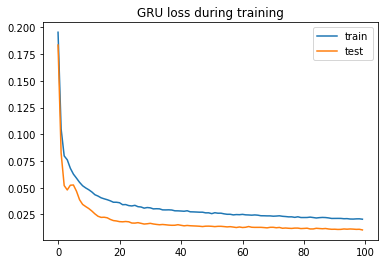

In [66]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("GRU loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.01203075 MSE (0.10968476 RMSE ) , 97.40418119  ACC
Validation Score: 0.01045433 MSE (0.10224644 RMSE ) , 85.09749304  ACC


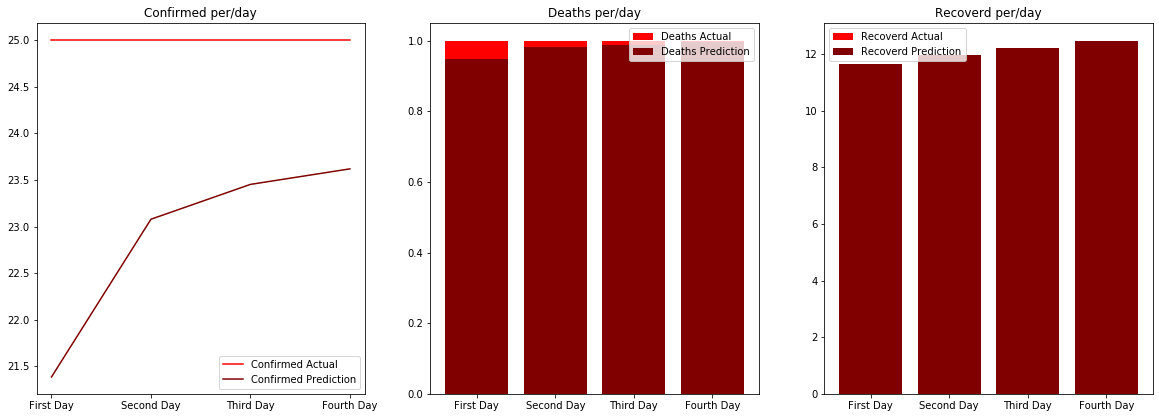

In [67]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Only  Covid data

In [68]:
df_covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Outbreak
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22,COVID_2019
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22,COVID_2019
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22,COVID_2019
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22,COVID_2019
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22,COVID_2019


In [69]:
df=df_covid_19
df['Province/State'] = df['Province/State'].astype('category')
df['Country/Region'] = df['Country/Region'].astype('category')
df['Outbreak'] = df['Outbreak'].astype('category')
df['Province/State'] = df['Province/State'].cat.codes
df['Country/Region'] = df['Country/Region'].cat.codes
df['Outbreak'] = df['Outbreak'].cat.codes

In [71]:
df=df[[ 'Province/State', 'Country/Region', 'Confirmed','Deaths','Recovered']]

In [82]:
def normalize_data(data, scaler, feature_len):
    minmaxscaler = scaler.fit(data)
    normalize_data = minmaxscaler.transform(data)
    return normalize_data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=2, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (1698, 6, 5)
train data:  (1358, 2, 5) (1358, 4, 5)
validate data:  (340, 2, 5) (340, 4, 5)


In [75]:
input_shape = (2, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 1358 samples, validate on 340 samples
Epoch 1/100
1358/1358 [==============================] - 5s 4ms/step - loss: 0.0680 - acc: 0.5863 - rmse: 0.2209 - mse: 0.0680 - r_square: -0.1112 - val_loss: 0.0677 - val_acc: 0.9382 - val_rmse: 0.2071 - val_mse: 0.0677 - val_r_square: 0.0229
Epoch 2/100
1358/1358 [==============================] - 0s 128us/step - loss: 0.0530 - acc: 0.9470 - rmse: 0.1907 - mse: 0.0530 - r_square: 0.1341 - val_loss: 0.0525 - val_acc: 0.9382 - val_rmse: 0.1756 - val_mse: 0.0525 - val_r_square: 0.2424
Epoch 3/100
1358/1358 [==============================] - 0s 124us/step - loss: 0.0403 - acc: 0.9485 - rmse: 0.1675 - mse: 0.0403 - r_square: 0.3428 - val_loss: 0.0416 - val_acc: 0.9382 - val_rmse: 0.1547 - val_mse: 0.0416 - val_r_square: 0.3997
Epoch 4/100
1358/1358 [==============================] - 0s 127us/step - loss: 0.0359 - acc: 0.9485 - rmse: 0.1612 - mse: 0.0359 - r_square: 0.4174 - val_loss: 0.0401 - val_acc: 0.9382 - val_rmse: 0.1498 - val_mse: 0.04

1358/1358 [==============================] - 0s 115us/step - loss: 0.0242 - acc: 0.9485 - rmse: 0.1289 - mse: 0.0242 - r_square: 0.6102 - val_loss: 0.0330 - val_acc: 0.9382 - val_rmse: 0.1354 - val_mse: 0.0330 - val_r_square: 0.5240
Epoch 68/100
1358/1358 [==============================] - 0s 108us/step - loss: 0.0241 - acc: 0.9485 - rmse: 0.1287 - mse: 0.0241 - r_square: 0.6113 - val_loss: 0.0329 - val_acc: 0.9382 - val_rmse: 0.1354 - val_mse: 0.0329 - val_r_square: 0.5244
Epoch 69/100
1358/1358 [==============================] - 0s 134us/step - loss: 0.0241 - acc: 0.9485 - rmse: 0.1286 - mse: 0.0241 - r_square: 0.6104 - val_loss: 0.0329 - val_acc: 0.9382 - val_rmse: 0.1353 - val_mse: 0.0329 - val_r_square: 0.5249
Epoch 70/100
1358/1358 [==============================] - 0s 139us/step - loss: 0.0241 - acc: 0.9485 - rmse: 0.1288 - mse: 0.0241 - r_square: 0.6114 - val_loss: 0.0329 - val_acc: 0.9382 - val_rmse: 0.1352 - val_mse: 0.0329 - val_r_square: 0.5256
Epoch 71/100
1358/1358 [=====

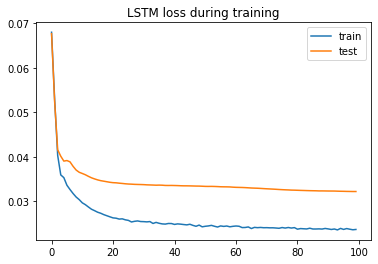

In [76]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("LSTM loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.02283973 MSE (0.15112820 RMSE ) , 94.84536069  ACC
Validation Score: 0.03220851 MSE (0.17946730 RMSE ) , 93.82352925  ACC


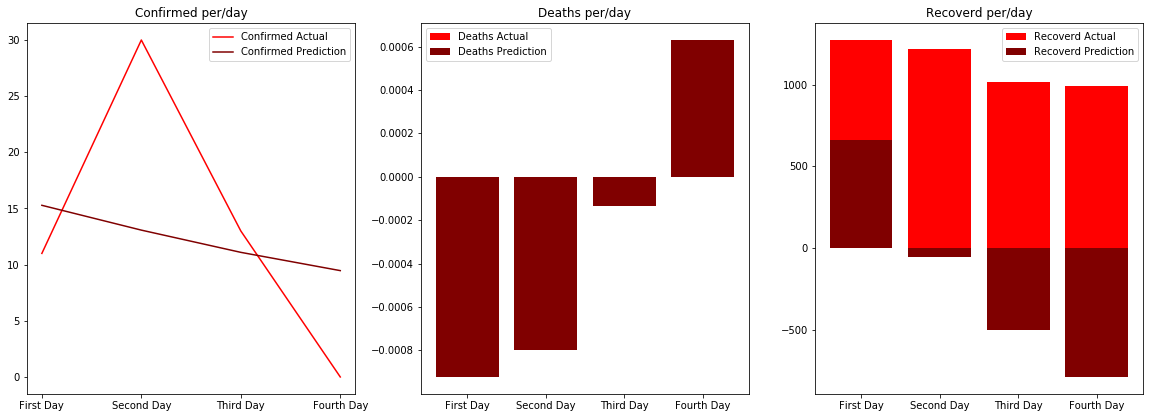

In [77]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Seq2Seq

In [79]:
input_shape = (2, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 1358 samples, validate on 340 samples
Epoch 1/100
1358/1358 [==============================] - 10s 7ms/step - loss: 0.0631 - acc: 0.7958 - rmse: 0.2109 - mse: 0.0631 - r_square: -0.0339 - val_loss: 0.0590 - val_acc: 0.9382 - val_rmse: 0.1890 - val_mse: 0.0590 - val_r_square: 0.1484
Epoch 2/100
1358/1358 [==============================] - 0s 166us/step - loss: 0.0455 - acc: 0.9483 - rmse: 0.1739 - mse: 0.0455 - r_square: 0.2567 - val_loss: 0.0420 - val_acc: 0.9382 - val_rmse: 0.1547 - val_mse: 0.0420 - val_r_square: 0.3943
Epoch 3/100
1358/1358 [==============================] - 0s 163us/step - loss: 0.0385 - acc: 0.9485 - rmse: 0.1592 - mse: 0.0385 - r_square: 0.3737 - val_loss: 0.0360 - val_acc: 0.9382 - val_rmse: 0.1421 - val_mse: 0.0360 - val_r_square: 0.4797
Epoch 4/100
1358/1358 [==============================] - 0s 166us/step - loss: 0.0359 - acc: 0.9485 - rmse: 0.1523 - mse: 0.0359 - r_square: 0.4176 - val_loss: 0.0356 - val_acc: 0.9382 - val_rmse: 0.1412 - val_mse: 0.0

1358/1358 [==============================] - 0s 170us/step - loss: 0.0233 - acc: 0.9485 - rmse: 0.1258 - mse: 0.0233 - r_square: 0.6241 - val_loss: 0.0334 - val_acc: 0.9382 - val_rmse: 0.1361 - val_mse: 0.0334 - val_r_square: 0.5174
Epoch 68/100
1358/1358 [==============================] - 0s 162us/step - loss: 0.0233 - acc: 0.9485 - rmse: 0.1259 - mse: 0.0233 - r_square: 0.6239 - val_loss: 0.0334 - val_acc: 0.9382 - val_rmse: 0.1361 - val_mse: 0.0334 - val_r_square: 0.5175
Epoch 69/100
1358/1358 [==============================] - 0s 165us/step - loss: 0.0233 - acc: 0.9485 - rmse: 0.1257 - mse: 0.0233 - r_square: 0.6240 - val_loss: 0.0335 - val_acc: 0.9382 - val_rmse: 0.1360 - val_mse: 0.0335 - val_r_square: 0.5170
Epoch 70/100
1358/1358 [==============================] - 0s 170us/step - loss: 0.0233 - acc: 0.9485 - rmse: 0.1258 - mse: 0.0233 - r_square: 0.6240 - val_loss: 0.0334 - val_acc: 0.9382 - val_rmse: 0.1362 - val_mse: 0.0334 - val_r_square: 0.5176
Epoch 71/100
1358/1358 [=====

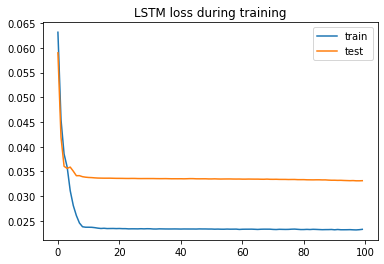

In [80]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("LSTM loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.02310185 MSE (0.15199293 RMSE ) , 94.84536069  ACC
Validation Score: 0.03313141 MSE (0.18202037 RMSE ) , 93.82352925  ACC


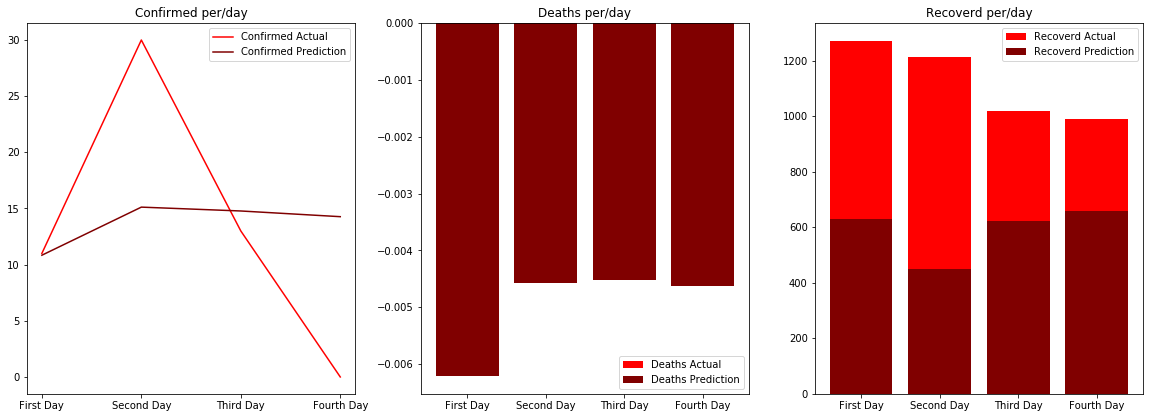

In [81]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# GRU

In [84]:
input_shape = (2, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 1358 samples, validate on 340 samples
Epoch 1/100
1358/1358 [==============================] - 5s 4ms/step - loss: 0.0663 - acc: 0.6359 - rmse: 0.2217 - mse: 0.0663 - r_square: -0.0881 - val_loss: 0.0550 - val_acc: 0.9382 - val_rmse: 0.1824 - val_mse: 0.0550 - val_r_square: 0.2053
Epoch 2/100
1358/1358 [==============================] - 0s 107us/step - loss: 0.0439 - acc: 0.9380 - rmse: 0.1798 - mse: 0.0439 - r_square: 0.2840 - val_loss: 0.0400 - val_acc: 0.9382 - val_rmse: 0.1510 - val_mse: 0.0400 - val_r_square: 0.4229
Epoch 3/100
1358/1358 [==============================] - 0s 108us/step - loss: 0.0385 - acc: 0.9475 - rmse: 0.1717 - mse: 0.0385 - r_square: 0.3752 - val_loss: 0.0377 - val_acc: 0.9382 - val_rmse: 0.1461 - val_mse: 0.0377 - val_r_square: 0.4556
Epoch 4/100
1358/1358 [==============================] - 0s 111us/step - loss: 0.0375 - acc: 0.9470 - rmse: 0.1692 - mse: 0.0375 - r_square: 0.3905 - val_loss: 0.0375 - val_acc: 0.9382 - val_rmse: 0.1451 - val_mse: 0.03

1358/1358 [==============================] - 0s 97us/step - loss: 0.0241 - acc: 0.9485 - rmse: 0.1292 - mse: 0.0241 - r_square: 0.6101 - val_loss: 0.0325 - val_acc: 0.9382 - val_rmse: 0.1343 - val_mse: 0.0325 - val_r_square: 0.5302
Epoch 68/100
1358/1358 [==============================] - 0s 94us/step - loss: 0.0243 - acc: 0.9485 - rmse: 0.1298 - mse: 0.0243 - r_square: 0.6076 - val_loss: 0.0325 - val_acc: 0.9382 - val_rmse: 0.1345 - val_mse: 0.0325 - val_r_square: 0.5303
Epoch 69/100
1358/1358 [==============================] - 0s 94us/step - loss: 0.0240 - acc: 0.9485 - rmse: 0.1288 - mse: 0.0240 - r_square: 0.6125 - val_loss: 0.0324 - val_acc: 0.9382 - val_rmse: 0.1342 - val_mse: 0.0324 - val_r_square: 0.5316
Epoch 70/100
1358/1358 [==============================] - 0s 96us/step - loss: 0.0238 - acc: 0.9485 - rmse: 0.1283 - mse: 0.0238 - r_square: 0.6150 - val_loss: 0.0324 - val_acc: 0.9382 - val_rmse: 0.1340 - val_mse: 0.0324 - val_r_square: 0.5319
Epoch 71/100
1358/1358 [=========